In [117]:
#import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
#Read the excel file and store the sheets into dataframes.
dataset = pd.ExcelFile('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/V02Max_Combined.xlsx')

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon')
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing')

# Qs1: Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [ ]:
# Concatenate sports DataFrames
All_sports=pd.concat([Kayaking, Triathlon, Fencing])


# write the dataframe in excel
All_sports.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/All_sports.xlsx')

# Qs2: Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [ ]:
# three conditions
conditions=[
    (All_sports['time']<0),
    (All_sports['time']>=0) & (All_sports['power']>0),
    (All_sports['power']<=0)
]
choices=['Warm up','GET','Cool down']

# create a new column stage for 3 parts
All_sports['stage']=np.select(conditions,choices,default='cool down')

In [ ]:
# merege the All_sports dataframe with Athletes table
merged_sports=pd.merge(All_sports,Athletes,on='ID',how='inner')
print(merged_sports)

       ID     time     RR       VO2  power      stage  age  Weight  Height  \
0      11 -168.600  727.0  0.287147      0    Warm up   18    84.8     182   
1      11 -167.872  728.0  0.287147      0    Warm up   18    84.8     182   
2      11 -167.148  724.0  0.287147      0    Warm up   18    84.8     182   
3      11 -166.484  664.0  0.320580      0    Warm up   18    84.8     182   
4      11 -165.836  648.0  0.320580      0    Warm up   18    84.8     182   
...    ..      ...    ...       ...    ...        ...  ...     ...     ...   
52057  10  942.700  428.0  0.786363      0  Cool down   14    58.8     177   
52058  10  943.124  424.0  0.786363      0  Cool down   14    58.8     177   
52059  10  943.552  428.0  0.786363      0  Cool down   14    58.8     177   
52060  10  943.976  424.0  0.786363      0  Cool down   14    58.8     177   
52061  10  944.404  428.0  0.786363      0  Cool down   14    58.8     177   

       P_vt1  P_vt2    sport  Gender Ethnicity First Name Last 

In [ ]:
# Function for create HeartRate
def Heart_Rate(rr):
    return round(60*1000/rr,2)
# Function for create HeartRate_Zones
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
# Add HR and HR_Zone in the merged dataset
merged_sports['HR']=merged_sports['RR'].apply(Heart_Rate)
merged_sports['HR_Zone']=merged_sports['HR'].apply(Heartrate_Zone)

# Qs3 What was the average time each tested lasted excluding warm up for all athletes?

In [72]:
test_combined=All_sports[All_sports['stage']!='Warm up']
avg_time=test_combined['time'].mean()
print(f'The average time each test lasted excluding warmup for all athelets is: {avg_time:.2f} seconds')

The average time each test lasted excluding warmup for all athelets is: 604.00 seconds


# Qs4 Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [74]:
avg_HRV_sport=merged_sports.groupby('sport')['RR'].std()
print(avg_HRV_sport)
#avg_hr=avg_HRV_sport.groupby('sport')
#Highest_avg_HRV_sport=avg_hr.idxmax()
#Highest_HRV_value=avg_hr.max()
#print(f'The sport with highest average cadiorespiratory fitness in terms of HRV (RR interval) is {Highest_avg_HRV_sport} with an average HRV of {Highest_HRV_value:.2f}')

sport
fencing      193.056530
kayak        251.279363
triathlon    138.401081
Name: RR, dtype: float64


# QS5 What was the average time each test lasted (including warm up) for all athletes?

In [78]:
#print(combined)
Test_Warmup=All_sports[(All_sports['stage']=='GET') & (All_sports['stage']=='Warm up')]
print(Test_Warmup)
avg_time_warmup=Test_Warmup['time'].mean()
print(f'The average time each test lasted including warmup for all athelets is {avg_time_warmup:.2f} minutes')

Empty DataFrame
Columns: [ID, time, RR, VO2, power, stage]
Index: []
The average time each test lasted including warmup for all athelets is nan minutes


# Qs6 What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports.

In [79]:
merged_sports=merged_sports[merged_sports['power']>0]
wattage=merged_sports['power'].mode()[0]
common_wattage=merged_sports[merged_sports['power'] == wattage]
average_time=common_wattage['time'].mean()
print(f'common wattage{wattage:.2f}average time:{average_time:.2f}')

common wattage50.00average time:92.24


# Qs7 Create a correlation matrix to show the relationship between HR, BMI and sport?

In [82]:
Athletes['BMI']=Athletes['Weight']/(Athletes['Height']**2)
#print(Athletes)
merged=pd.merge(All_sports,Athletes,on='ID')

merged['sport_num']=pd.factorize(merged['sport'])[0]

correlation_matrix=merged[['BMI','sport_num','HR']].corr()
print(correlation_matrix)

KeyError: "['HR'] not in index"

# Qs8  What are the names of the kayaking athletes?

In [97]:
merged_kayaking=pd.merge(Kayaking,Athletes, on='ID')
#print(merged_kayaking[['First Name','Last Name']])
Athletes_1=Athletes[Athletes['sport']=='kayak']
print(Athletes_1[['First Name','Last Name']])


   First Name  Last Name
10   Isabella    Griffin
11      Caleb      Dixon
12        Mia  Carpenter
13     Harper   Mitchell
14      Mason    Wallace
15      Logan   Anderson


# QS9 What was the average HRV of the triathletes?

In [98]:
triathlon_1=merged_sports[merged_sports['sport']=='triathlon']
HRV=triathlon_1['RR'].std()
print(f"The average HRV of the Triathlon is {HRV:.2f}")

The average HRV of the Triathlon is 59.31


# Qs10 How long was athlete 12 in HR Zone 5?

In [107]:
Athelet_12= merged_sports[merged_sports['ID']==12]
#print(Athelet_12)
Athelet_12_Zone5= Athelet_12[Athelet_12['HR_Zone']=='Zone 5(AnAerobic)']
#print(Athelet_12_Zone5)
Total_time=Athelet_12_Zone5['time'].sum()
print(round(Total_time,2))

1235585.95


# Qs11 Create any 3d plot using any data. Values do not have to be from the dataset given?

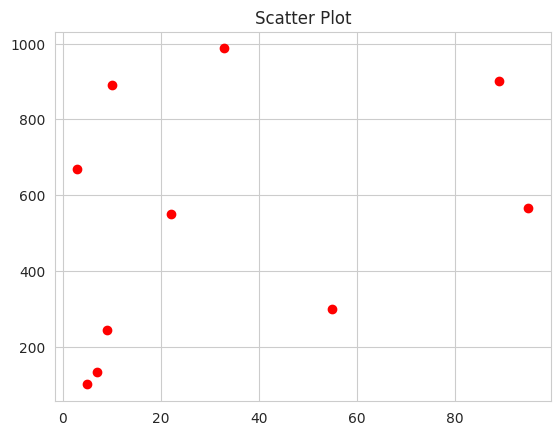

In [106]:

x=[5,7,9,22,3,89,10,95,33,55]
y=[100,133,244,550,670,900,890,567,987,300]
plt.scatter(x,y,c='red')
plt.title('Scatter Plot')

plt.show()

# QS12 What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes?

In [113]:


# Adding all VO2 values for each athlete
vO2_sum=All_sports.groupby(['ID'])['VO2'].sum()
#print(vO2_sum_df)

#Inner join on VO2sum and athletes based on ID and writing the specific values to a new dataframe
athletenew_df=pd.merge(Athletes,vO2_sum, on='ID', how='inner')[['ID','First Name','Last Name','Weight','Height','sport','VO2']]
#print(athletenew_df)


#Calculating VO2ml/kg for each athlete and writing it to the dataframe
athletenew_df['VO2mlperkg']=(athletenew_df['VO2']/athletenew_df['Weight'])
print(athletenew_df.sort_values(by='VO2mlperkg',ascending=False).head(3))

    ID First Name  Last Name  Weight  Height  sport          VO2  VO2mlperkg
11  12      Caleb      Dixon    86.0     183  kayak  7934.206192   92.258212
12  13        Mia  Carpenter    83.9     183  kayak  7614.654355   90.758693
10  11   Isabella    Griffin    84.8     182  kayak  7596.969334   89.586903


# Qs13 Calculate the year of birth of each athlete and store it as a column in the tables.

In [118]:
Athletes['DOB']=datetime.now().year-Athletes['age']
print(Athletes)

    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

# Qs14 What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [119]:
print(athletenew_df.sort_values(by='VO2mlperkg').head(3))

   ID First Name Last Name  Weight  Height    sport          VO2  VO2mlperkg
6   7      Grace   Simmons    49.8     165  fencing  1912.518617   38.403988
1   2      Ethan  Reynolds    56.2     162  fencing  2171.152256   38.632602
0   1     Olivia  Martinez    53.7     161  fencing  2298.775092   42.807730


# Qs15 Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
#Zone 1 (recovery/easy)       <100 HR max
#Zone 2 (aerobic/base)        100-120 HR max
#Zone 3 (tempo)        120-135 HR max
#Zone 4 (lactate threshold)        135-155 HR max
# Zone 5 (anaerobic)        155+ HR max and above

In [122]:


#pd.set_option('display.max_rows',1000)
print(merged_sports[['HR_Zone','HR']])

                      HR_Zone      HR
238    Zone 1 (recovery/easy)   94.94
239    Zone 1 (recovery/easy)   85.23
240    Zone 1 (recovery/easy)   80.21
241    Zone 1 (recovery/easy)   81.97
242    Zone 1 (recovery/easy)   88.24
...                       ...     ...
51539       Zone 5(AnAerobic)  189.87
51540       Zone 5(AnAerobic)  189.87
51541       Zone 5(AnAerobic)  187.50
51542       Zone 5(AnAerobic)  189.87
51543       Zone 5(AnAerobic)  189.87

[38733 rows x 2 columns]


# Qs16 Calculate the BMI of every athlete and display it as a list?

In [130]:
Athletes['BMI']=Athletes['Weight']/((Athletes['Height']/100)**2)
BMI_list=Athletes['BMI'].to_list()
for i in range(0,len(BMI_list)):
  BMI_list[i]=round(BMI_list[i],2)

print(BMI_list)

[20.72, 21.41, 24.64, 23.61, 22.08, 22.97, 18.29, 18.81, 18.43, 18.77, 25.6, 25.68, 25.05, 21.31, 21.46, 21.25, 16.4, 15.9]


# Qs33.Create a list and a tuple. Print the types and lengths of both

In [ ]:
list=['My','2nd','Python','Hackathon']
print(f"The type of this:", type(list) ,"and length of the list is:", len(list))

tuple=('Python','Hackathon','is','in','progress')
print(f"Type of this is: ",{type(tuple)},"and length of the tuple is: ", len(tuple))

The type of this: <class 'list'> and length of the list is: 4
Type of this is:  {<class 'tuple'>} and length of the tuple is:  5


# Qs34 Display a word cloud using any values in the dataset

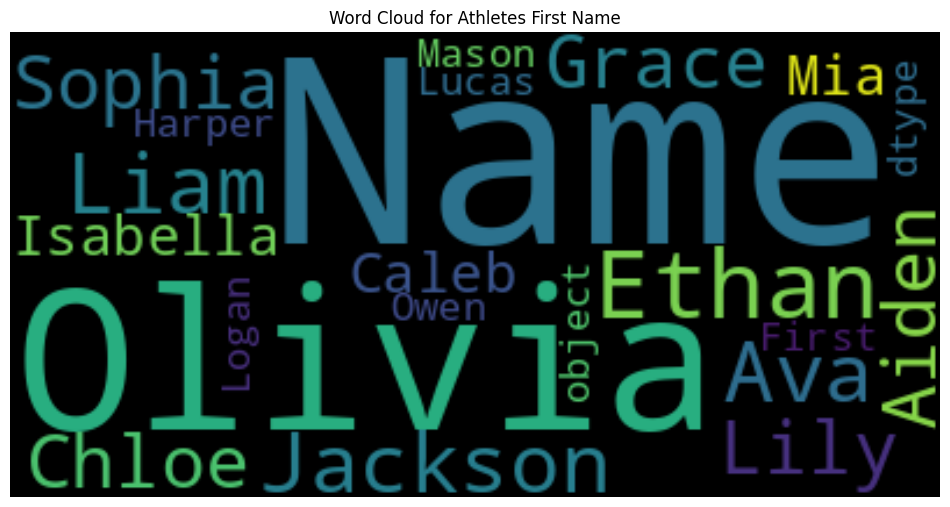

In [ ]:
# iterate through the Athletes data frame
for Name in Athletes.iterrows():

  # typecaste each First Name to string
  first_names = str(Athletes['First Name'])

wordcloud = wc.WordCloud(width=400, height=200, background_color='black').generate(first_names)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Athletes First Name')
plt.axis('off')
plt.show()

# Qs35 Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

<Figure size 1200x800 with 0 Axes>

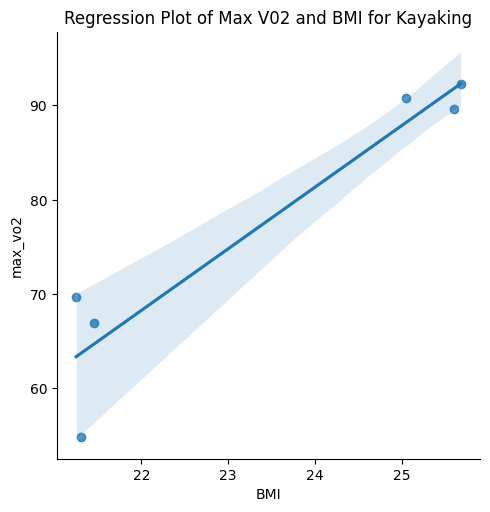

In [ ]:
# store sum of VO2 by grouping on ID
sum_vo2=Kayaking.groupby('ID')['VO2'].sum()

# merge to get ALL deTils
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight','Height']]
# itterate through for loop to get MAX VO2 and BMI
for index, row in df1.iterrows():

        df1.at[index, 'max_vo2'] = round(df1.at[index, 'VO2']/df1.at[index, 'Weight'],2)
        df1.at[index, 'BMI'] = round(df1.at[index, 'Weight']/((df1.at[index, 'Height']/100)**2),2)
#print(df1)
plt.figure(figsize=(12,8))
sns.lmplot(x ='BMI', y ='max_vo2', data = df1)
sns.set_style('whitegrid')
plt.title('Regression Plot of Max V02 and BMI for Kayaking')
plt.show()



# Qs36 Plot the time series of HR( every 5 mins) of athlete 1

time
0 days 00:00:00    135.737023
0 days 00:05:00    176.709112
0 days 00:10:00    192.821149
Freq: 5T, Name: HR, dtype: float64


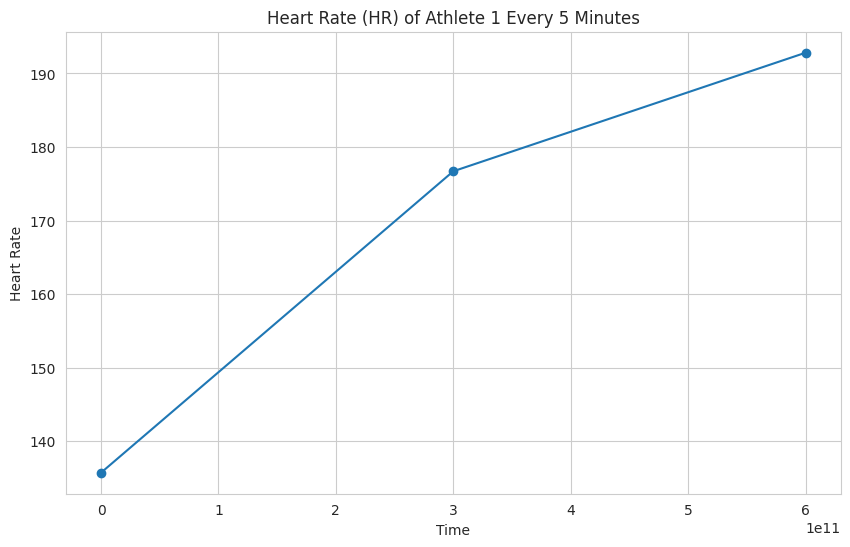

In [ ]:
# here I considered only GET test HR values

df_ath1=merged_sports.loc[(merged_sports['ID']==1) & (merged_sports['stage']=='GET')][['ID','time','HR']].reset_index().drop('index',axis=1)
#print(df_ath1)

df_ath1['time'] = pd.to_timedelta(df_ath1['time'],unit='s')

df_ath1.set_index('time', inplace=True)

#print(df_ath1)
# Resample the data to 5-minute intervals, calculating the mean HR in each interval
df_ath1_resampled = df_ath1['HR'].resample('5T').mean()

print(df_ath1_resampled)

plt.figure(figsize=(10, 6))
plt.plot(df_ath1_resampled, marker='o', linestyle='-')
plt.title('Heart Rate (HR) of Athlete 1 Every 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()


# Qs37 What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [ ]:
# get the maximum power
result=All_sports.loc[All_sports['power']==All_sports['power'].max()]
#print(result)
# merge the data for other details
result1=pd.merge(result,Athletes,on='ID',how='inner')[['First Name','Last Name','sport','power']]
print("The maximum power achieved by:")
result1.iloc[0]

The maximum power achieved by:


,0
First Name,Isabella
Last Name,Griffin
sport,kayak
power,335


# Qs38: What is the average difference in IBI during the warm up Vs the actual test?

In [ ]:
# Get the average IBI/RR by stage
avg_IBI=merged_sports.groupby('stage')['RR'].mean()
#print(avg_IBI)
print("The average difference in IBI during the warm up Vs the actual test is :" ,round(avg_IBI['Warm up']-avg_IBI['GET'],2))

The average difference in IBI during the warm up Vs the actual test is : 357.62


# Qs39 Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]

In [ ]:
array=np.array([1, 2, 3, 4, 5,6,7,8,9,10])
print(array[7])
#print(array[10])  #Index 10 will give error as indexes starting from 0-9 for this array
print(array[3])

8
4


Qs40  [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
#       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99

In [ ]:
my_array=np.array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26,27,28,29, 30] ] )

print(my_array[0][0],my_array[0][2],my_array[0][4])

for i in range(6):
  for j in range(5):
    if my_array[i][j]<4:
      my_array[i][j]=99
print(my_array)

1 3 5
[[99 99 99  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


# Qs41 What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [ ]:
# here considering only GET values
GET_test=merged_sports.loc[merged_sports['stage']=='GET']

# get the end time
end_of_test=GET_test.groupby('ID')['time'].max()

#print(end_of_test)
wattage=pd.merge(end_of_test,GET_test,on=['ID','time'],how='inner')[['ID','First Name','Last Name','sport','power']].sort_values(by='power')
#print(wattage)
print("The lowest wattage achieved at the end of a test by:" ,wattage.loc[wattage['power']==wattage['power'].min()].iloc[0].to_string(index=False))

The lowest wattage achieved at the end of a test by:        2
   Ethan
Reynolds
 fencing
     140


# Qs42 What was the difference in heart rate between warm up and GET for athlete 1

In [ ]:
#
df_ath1_HRinfo=merged_sports.loc[( merged_sports['ID']==1) & (merged_sports['stage'] !='Cool down')][['stage','HR']]
print(df_ath1_HRinfo.groupby('stage').mean())
print("The difference in heart rate between warm up and GET for athlete 1 is: ",df_ath1_HRinfo.groupby('stage').mean().iloc[1,0]-df_ath1_HRinfo.groupby('stage').mean().iloc[0,0])


                 HR
stage              
GET      162.473267
Warm up   79.986590
The difference in heart rate between warm up and GET for athlete 1 is:  -82.48667773135695


# Qs43 Create a pivot table that shows count of patients within each age group and sport

In [ ]:
Athletes.pivot_table(columns="sport", index="age", values="ID", aggfunc="count", margins="True")


sport,fencing,kayak,triathlon,All
age,,,,
12,NaN,NaN,2.0,2
13,NaN,2.0,NaN,2
14,2.0,NaN,NaN,2
15,4.0,NaN,NaN,4
16,2.0,1.0,NaN,3
17,2.0,NaN,NaN,2
18,NaN,3.0,NaN,3
All,10.0,6.0,2.0,18


# Qs44 Display a distrubution chart of MAX V02 for all athletes

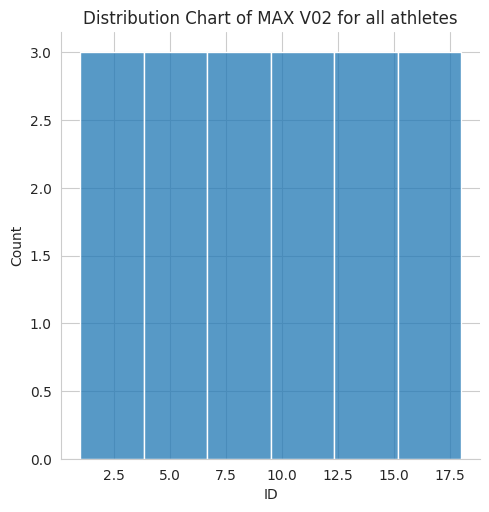

In [ ]:
sum_VO2=merged_sports.groupby('ID')['VO2'].sum()
#print(sum_VO2)

sum_VO2_max=pd.merge(sum_VO2,Athletes,on='ID',how='inner')[['ID','VO2','Weight']]
sum_VO2_max['VO2_max']=round(sum_VO2_max['VO2']/sum_VO2_max['Weight'],2)
max_vo2_by_athlete=sum_VO2_max[['ID','VO2_max']]
#print(max_vo2_by_athlete)

#sns.histplot(max_vo2_by_athlete, kde=True, bins=20, color='blue')
sns.displot(max_vo2_by_athlete['ID'])
plt.title('Distribution Chart of MAX V02 for all athletes')
plt.show()

# Qs45 Create a dummy array with no data with a size of 15.

In [ ]:
# Create a dummy array with a size of 15
dummy_array = np.empty(15)

print(dummy_array)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Qs46 How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [ ]:
df_ath15_info=merged_sports.loc[(merged_sports['ID']==15) & (merged_sports['stage']=='GET')].reset_index().drop('index',axis=1)[['time','VO2','Weight']]
#print(df_ath15_info)
print("Participant 15's exercise last for:",df_ath15_info.iloc[-1]['time'],"seconds")
VO2_MAX=df_ath15_info['VO2'].sum()/df_ath15_info['Weight']
print("The total V02 max consumed during the test is:",VO2_MAX.iloc[1])

Participant 15's exercise last for: 805.26 seconds
The total V02 max consumed during the test is: 56.6426648792126



# Qs 47 Convert ' sport' into a numeric field through Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Athletes['sport_LabelEncoding']=le.fit_transform(Athletes['sport'])
Athletes

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,sport_LabelEncoding
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,0
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,0
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,0
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,0
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,0
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,0
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,0
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,0
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,0
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,0


# Qs48 What was the average age of the athletes?

In [ ]:
print("The average age of the Athletes is: ",  round(Athletes['age'].mean(),2))

The average age of the Athletes is:  15.22
